In [2]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
df = pd.read_csv('C:/Users/shrhegde/Downloads/big_startup_secsees_dataset/big_startup_secsees_dataset.csv')
df.head()

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
0,/organization/-fame,#fame,http://livfame.com,Media,10000000,operating,IND,16,Mumbai,Mumbai,1,NaN,2015-01-05,2015-01-05
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,700000,operating,USA,DE,DE - Other,Delaware City,2,2014-09-04,2014-03-01,2014-10-14
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,3406878,operating,NaN,NaN,NaN,NaN,1,NaN,2014-01-30,2014-01-30
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,2000000,operating,CHN,22,Beijing,Beijing,1,2007-01-01,2008-03-19,2008-03-19
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,-,operating,USA,IL,"Springfield, Illinois",Champaign,1,2010-01-01,2014-07-24,2014-07-24


In [3]:
print(df.dtypes)

permalink            object
name                 object
homepage_url         object
category_list        object
funding_total_usd    object
status               object
country_code         object
state_code           object
region               object
city                 object
funding_rounds        int64
founded_at           object
first_funding_at     object
last_funding_at      object
dtype: object


In [4]:
# Convert date columns to datetime
date_columns = ['founded_at', 'first_funding_at', 'last_funding_at']
for column in date_columns:
    df[column] = pd.to_datetime(df[column], errors='coerce')

# Ensure numerical columns are in the correct format
numerical_columns = ['funding_total_usd', 'funding_rounds']
for column in numerical_columns:
    df[column] = pd.to_numeric(df[column], errors='coerce')
print(df.dtypes)

permalink                    object
name                         object
homepage_url                 object
category_list                object
funding_total_usd           float64
status                       object
country_code                 object
state_code                   object
region                       object
city                         object
funding_rounds                int64
founded_at           datetime64[ns]
first_funding_at     datetime64[ns]
last_funding_at      datetime64[ns]
dtype: object


In [5]:
df.head()

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
0,/organization/-fame,#fame,http://livfame.com,Media,10000000.0,operating,IND,16,Mumbai,Mumbai,1,NaT,2015-01-05,2015-01-05
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,700000.0,operating,USA,DE,DE - Other,Delaware City,2,2014-09-04,2014-03-01,2014-10-14
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,3406878.0,operating,NaN,NaN,NaN,NaN,1,NaT,2014-01-30,2014-01-30
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,2000000.0,operating,CHN,22,Beijing,Beijing,1,2007-01-01,2008-03-19,2008-03-19
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,NaN,operating,USA,IL,"Springfield, Illinois",Champaign,1,2010-01-01,2014-07-24,2014-07-24


In [6]:
#defining missing values
def handle_missing_values(df):
    for column in df.columns:
        if df[column].dtype == 'object':  # Categorical
            if df[column].isnull().sum() / len(df) > 0.5:
                df[column] = df[column].fillna("Others")
            else:
                df[column] = df[column].fillna(df[column].mode()[0])
        else:  # Numerical
            if df[column].isnull().sum() / len(df) > 0.5:
                df = df.drop(column, axis=1)
            else:
                df[column] = df[column].fillna(df[column].median())
    return df


In [7]:
#drop the duplicates vavlues
df = df.drop_duplicates()

In [8]:
df['funding_velocity'] = df['funding_total_usd'] / (df['last_funding_at'].dt.year - df['founded_at'].dt.year + 1)

In [9]:
df['company_age'] = pd.Timestamp.now().year - df['founded_at'].dt.year

In [10]:
import numpy as np

# Check for infinity values
inf_mask = np.isinf(df[numerical_columns].values)
if inf_mask.any():
    print("DataFrame contains infinity values.")

# Check for NaN values
nan_mask = df[numerical_columns].isna()
if nan_mask.any().any():
    print("DataFrame contains NaN values.")
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Example: Fill NaNs with the mean of each column
df[numerical_columns].fillna(df[numerical_columns].mean(), inplace=True)
print(df[numerical_columns].dtypes)

from sklearn.preprocessing import MinMaxScaler

numerical_columns = ['funding_total_usd', 'funding_velocity', 'company_age']
scaler = MinMaxScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

DataFrame contains NaN values.
funding_total_usd    float64
funding_rounds         int64
dtype: object


C:\Users\shrhegde\AppData\Local\Temp\ipykernel_10848\2007960189.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[numerical_columns].fillna(df[numerical_columns].mean(), inplace=True)


In [11]:
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = df[column].clip(lower_bound, upper_bound)
    return df

numerical_columns = ['funding_total_usd', 'funding_velocity', 'company_age']
for column in numerical_columns:
    df = handle_outliers(df, column)

In [12]:
def remove_correlated_features(df, threshold=0.8):
    corr_matrix = df.corr().abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
    df = df.drop(to_drop, axis=1)
    return df

df = remove_correlated_features(df)

C:\Users\shrhegde\AppData\Local\Temp\ipykernel_10848\1618147087.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr().abs()


In [13]:
df.head()

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,company_age
0,/organization/-fame,#fame,http://livfame.com,Media,0.000332,operating,IND,16,Mumbai,Mumbai,1,NaT,2015-01-05,2015-01-05,NaN
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,0.000023,operating,USA,DE,DE - Other,Delaware City,2,2014-09-04,2014-03-01,2014-10-14,0.255618
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,0.000113,operating,NaN,NaN,NaN,NaN,1,NaT,2014-01-30,2014-01-30,NaN
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,0.000066,operating,CHN,22,Beijing,Beijing,1,2007-01-01,2008-03-19,2008-03-19,0.275281
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,NaN,operating,USA,IL,"Springfield, Illinois",Champaign,1,2010-01-01,2014-07-24,2014-07-24,0.266854


In [14]:
# Check for remaining missing values
print(df.isnull().sum())

permalink                0
name                     1
homepage_url          5058
category_list         3148
funding_total_usd    12785
status                   0
country_code          6958
state_code            8547
region                8030
city                  8028
funding_rounds           0
founded_at           15225
first_funding_at        27
last_funding_at          0
company_age          15225
dtype: int64


In [15]:
# Drop irrelevant columns
irrelevant_columns = ['homepage_url', 'state_code', 'region', 'city', 'permalink']
df = df.drop(columns=irrelevant_columns)

In [16]:
# Check for missing values
missing_values = df.isnull().sum()

# Handle missing values for numerical features
df['funding_total_usd'] = df['funding_total_usd'].fillna(df['funding_total_usd'].median())
df['founded_at'] = pd.to_datetime(df['founded_at'], errors='coerce')

# Handle missing values for categorical features
df['category_list'] = df['category_list'].fillna('Unknown')
df['country_code'] = df['country_code'].fillna('Unknown')

# Drop rows where critical dates are missing
df = df.dropna(subset=['founded_at', 'first_funding_at', 'last_funding_at'])

In [17]:
# Transform funding_rounds into categorical stages
def categorize_funding_rounds(num_rounds):
    if num_rounds == 0:
        return 'No Funding'
    elif num_rounds <= 2:
        return 'Early Stage'
    elif num_rounds <= 4:
        return 'Growth Stage'
    else:
        return 'Late Stage'

df['funding_stage'] = df['funding_rounds'].apply(categorize_funding_rounds)

# Discretize funding_total_usd into funding levels
df['funding_level'] = pd.cut(df['funding_total_usd'], bins=[-1, 1000000, 10000000, 50000000, float('inf')],
                             labels=['Low', 'Medium', 'High', 'Very High'])
# Convert funding_level to object type
df['funding_level'] = df['funding_level'].astype('object')

In [18]:
print(df.isnull().sum())
print(df.dtypes)

name                 1
category_list        0
funding_total_usd    0
status               0
country_code         0
funding_rounds       0
founded_at           0
first_funding_at     0
last_funding_at      0
company_age          0
funding_stage        0
funding_level        0
dtype: int64
name                         object
category_list                object
funding_total_usd           float64
status                       object
country_code                 object
funding_rounds                int64
founded_at           datetime64[ns]
first_funding_at     datetime64[ns]
last_funding_at      datetime64[ns]
company_age                 float64
funding_stage                object
funding_level                object
dtype: object


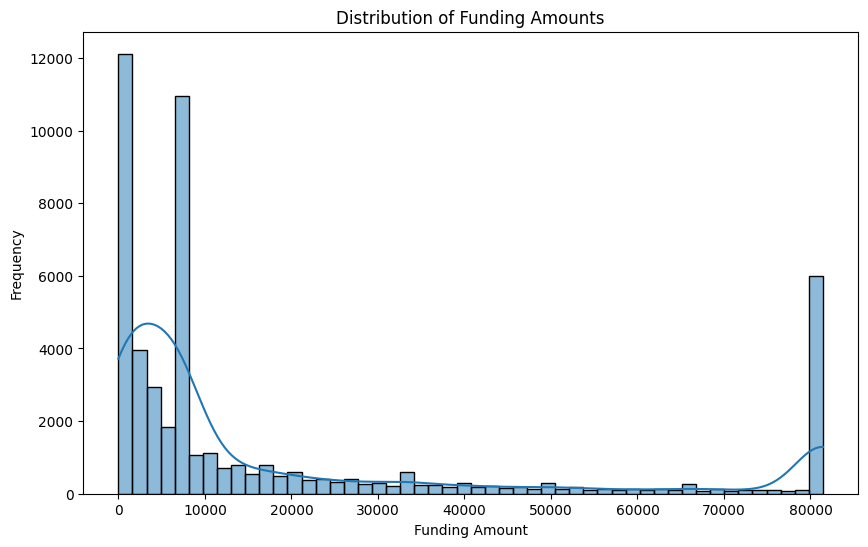

Mean Funding Amount: 19380.23  USD
Median Funding Amount: 6649.04  USD
Funding Range: 0.00  USD to 81439.39  USD


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming df is your DataFrame and 'funding_total_usd' column exists

# Scale the funding amounts to millions for easier handling
df['funding_total_usd'] = df['funding_total_usd'] * 100000000

# Plot the distribution of funding amounts in millions
plt.figure(figsize=(10, 6))
sns.histplot(df['funding_total_usd'].dropna(), bins=50, kde=True)
plt.title('Distribution of Funding Amounts')
plt.xlabel('Funding Amount')
plt.ylabel('Frequency')
plt.show()

# Calculate statistics
funding_mean = df['funding_total_usd'].mean()
funding_median = df['funding_total_usd'].median()
funding_min = df['funding_total_usd'].min()
funding_max = df['funding_total_usd'].max()

print(f"Mean Funding Amount: {funding_mean:.2f}  USD")
print(f"Median Funding Amount: {funding_median:.2f}  USD")
print(f"Funding Range: {funding_min:.2f}  USD to {funding_max:.2f}  USD")


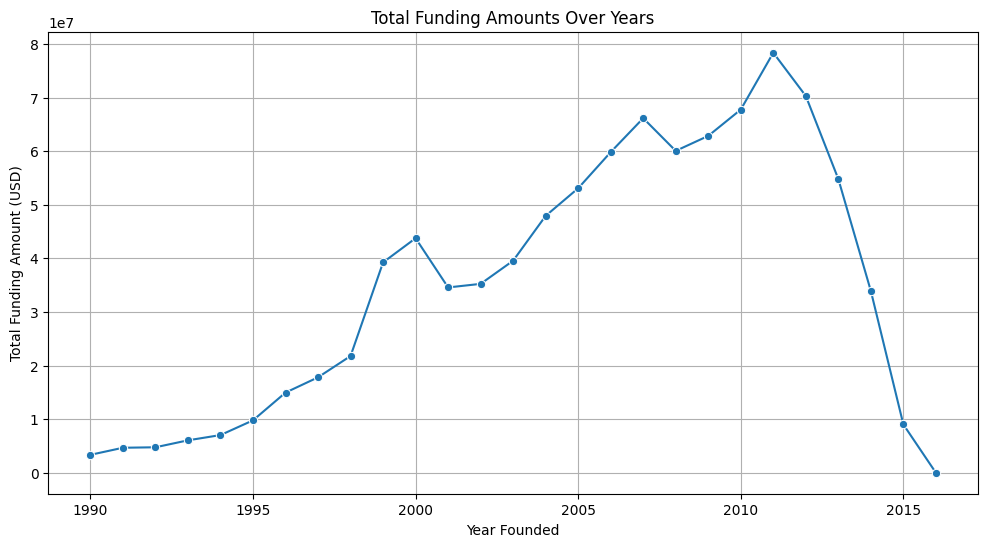

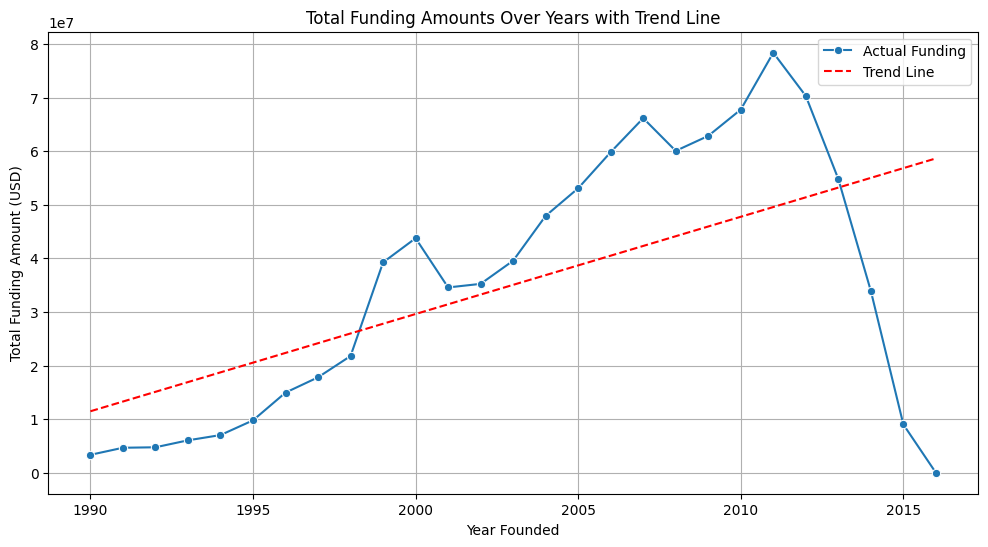

Trend Line Slope: 1814173.11
Trend Line Intercept: -3598725165.77


In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Example DataFrame creation for demonstration (use your actual DataFrame)
# df = pd.read_csv('your_data.csv')

# Convert 'founded_at' column to datetime
df['founded_at'] = pd.to_datetime(df['founded_at'], errors='coerce')

# Extract year from 'founded_at'
df['founded_year'] = df['founded_at'].dt.year

# Filter years between 1990 and 2024
filtered_df = df[(df['founded_year'] >= 1990) & (df['founded_year'] <= 2024)]

# Aggregate funding data by year
funding_by_year = filtered_df.groupby('founded_year')['funding_total_usd'].sum().reset_index()

# Plot the trend in funding over the years
plt.figure(figsize=(12, 6))
sns.lineplot(data=funding_by_year, x='founded_year', y='funding_total_usd', marker='o')
plt.title('Total Funding Amounts Over Years')
plt.xlabel('Year Founded')
plt.ylabel('Total Funding Amount (USD)')
plt.grid(True)
plt.show()

# Optional: Fit a linear regression model to assess the trend
from sklearn.linear_model import LinearRegression
import numpy as np

# Prepare the data for linear regression
X = funding_by_year[['founded_year']].values
y = funding_by_year['funding_total_usd'].values

# Fit the model
model = LinearRegression()
model.fit(X, y)

# Predict funding amounts based on the model
y_pred = model.predict(X)

# Plot the trend with the fitted line
plt.figure(figsize=(12, 6))
sns.lineplot(data=funding_by_year, x='founded_year', y='funding_total_usd', marker='o', label='Actual Funding')
plt.plot(funding_by_year['founded_year'], y_pred, color='red', linestyle='--', label='Trend Line')
plt.title('Total Funding Amounts Over Years with Trend Line')
plt.xlabel('Year Founded')
plt.ylabel('Total Funding Amount (USD)')
plt.legend()
plt.grid(True)
plt.show()

# Print the trend line coefficient
print(f"Trend Line Slope: {model.coef_[0]:.2f}")
print(f"Trend Line Intercept: {model.intercept_:.2f}")


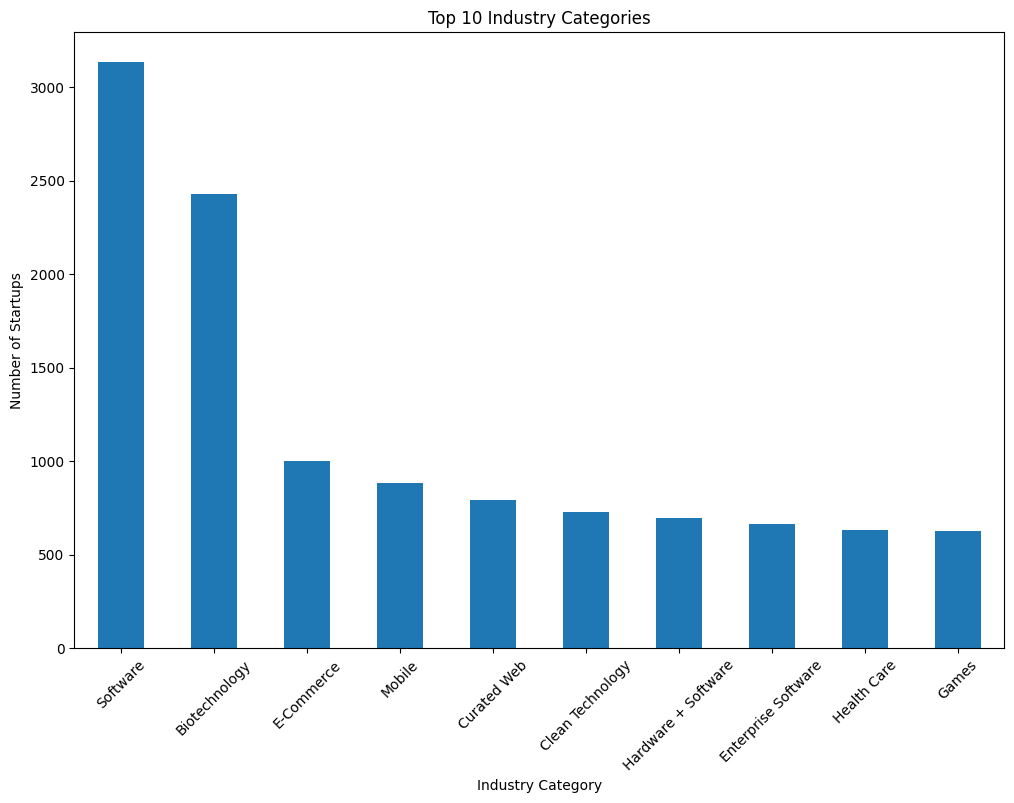

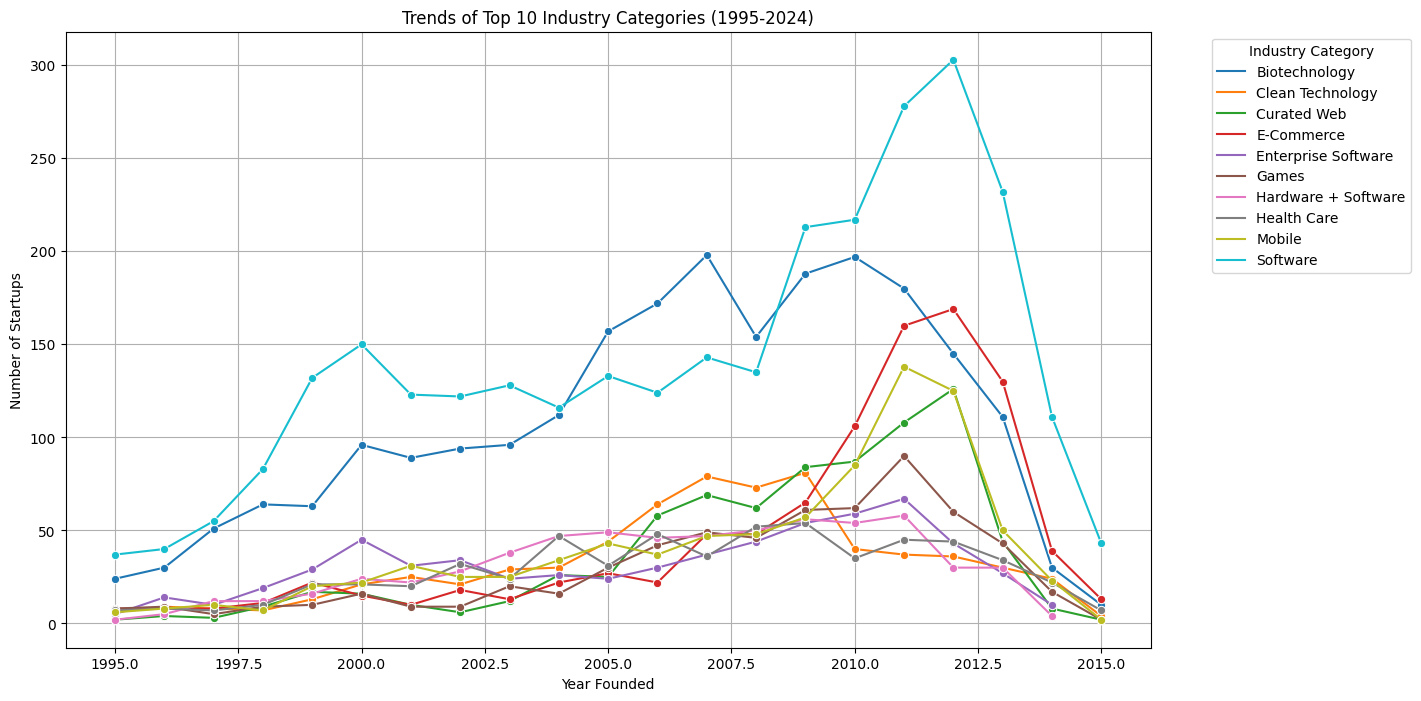

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Example DataFrame creation for demonstration (use your actual DataFrame)
# df = pd.read_csv('your_data.csv')

# Ensure 'founded_at' is converted to datetime and extract the year
df['founded_at'] = pd.to_datetime(df['founded_at'], errors='coerce')
df['founded_year'] = df['founded_at'].dt.year

# Filter out rows with unknown or unspecified category values
# Assuming 'Unknown' or similar terms are used for unknown categories
df = df[~df['category_list'].str.contains('Unknown', case=False, na=False)]

# Extract the top 10 industry categories
top_categories = df['category_list'].value_counts().head(10).index

# Filter the DataFrame to include only the top 10 categories and the year range 1995 to 2024
filtered_df = df[
    (df['category_list'].isin(top_categories)) &
    (df['founded_year'] >= 1995) &
    (df['founded_year'] <= 2024)
]

# Plot the distribution of the top 10 industry categories
plt.figure(figsize=(12, 8))
df['category_list'].value_counts().loc[top_categories].plot(kind='bar')
plt.title('Top 10 Industry Categories')
plt.xlabel('Industry Category')
plt.ylabel('Number of Startups')
plt.xticks(rotation=45)
plt.show()

# Aggregate the number of startups by year and category
trend_data = filtered_df.groupby(['founded_year', 'category_list']).size().reset_index(name='number_of_startups')

# Plot the trends for the top 10 industry categories
plt.figure(figsize=(14, 8))
sns.lineplot(data=trend_data, x='founded_year', y='number_of_startups', hue='category_list', marker='o')
plt.title('Trends of Top 10 Industry Categories (1995-2024)')
plt.xlabel('Year Founded')
plt.ylabel('Number of Startups')
plt.legend(title='Industry Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

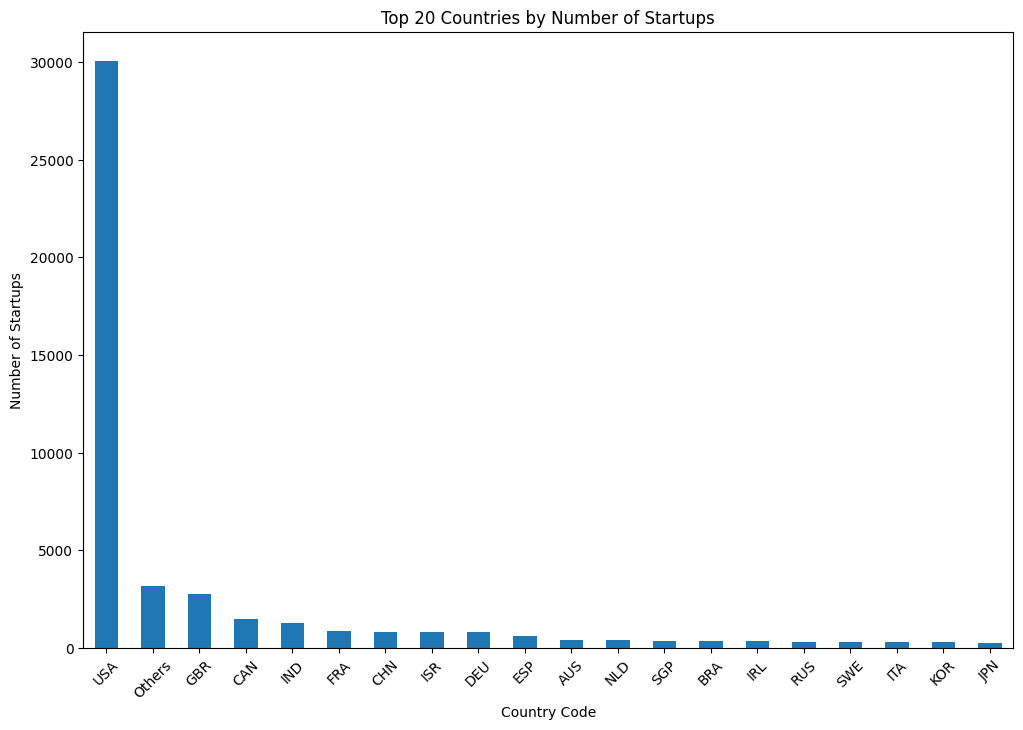

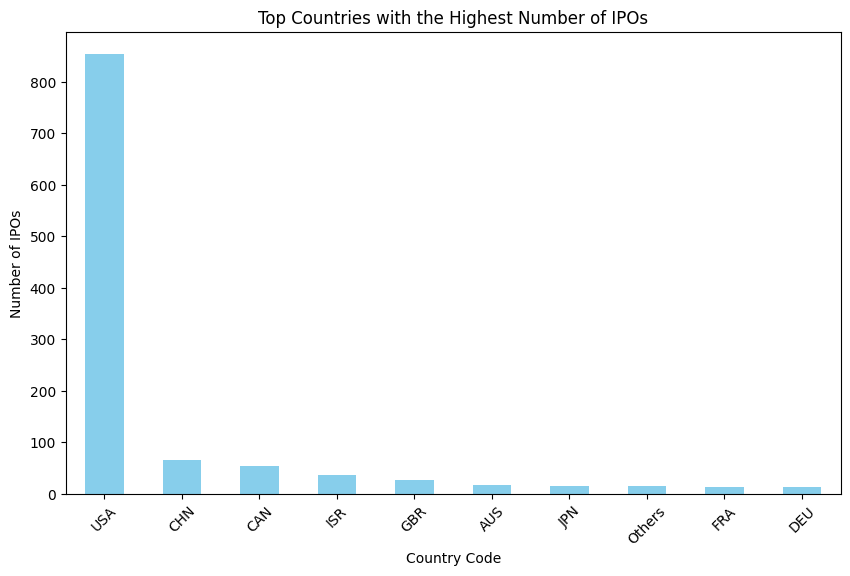

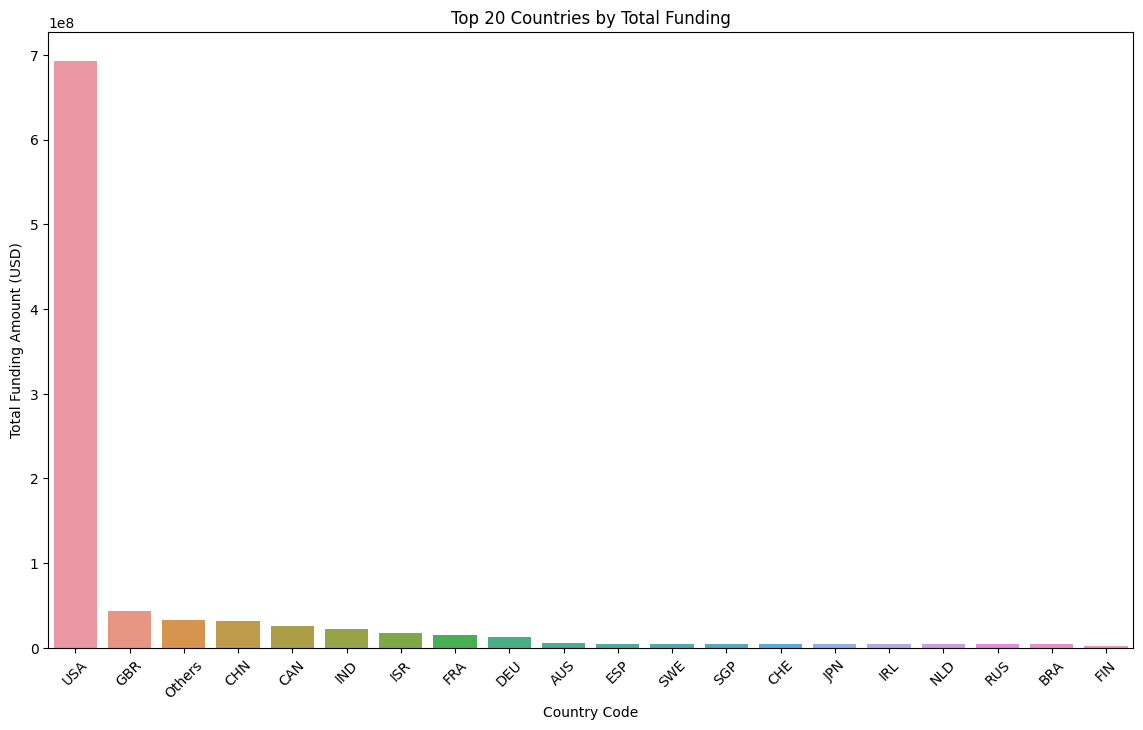

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Example DataFrame creation for demonstration (use your actual DataFrame)
# df = pd.read_csv('your_data.csv')

# Replace unknown or unspecified country codes with 'Others'
df['country_code'] = df['country_code'].replace(to_replace=['Unknown', ''], value='Others')

# Plot the distribution of startups by country
plt.figure(figsize=(12, 8))
df['country_code'].value_counts().head(20).plot(kind='bar')
plt.title('Top 20 Countries by Number of Startups')
plt.xlabel('Country Code')
plt.ylabel('Number of Startups')
plt.xticks(rotation=45)
plt.show()

# Calculate total funding by country
funding_by_country = df.groupby('country_code')['funding_total_usd'].sum().reset_index()

# Check if 'ipo' or 'status' column exists and update accordingly
# Assuming 'status' indicates IPO and 'ipo' is the IPO status
if 'status' in df.columns:
    # Filter for IPOs
    ipo_df = df[df['status'].str.lower() == 'ipo']  # Adjust 'ipo' if necessary
    
    # Count the number of IPOs per country
    ipo_counts = ipo_df['country_code'].value_counts()

    # Plot the top countries with the highest number of IPOs
    plt.figure(figsize=(10, 6))
    ipo_counts.head(10).plot(kind='bar', color='skyblue')
    plt.title('Top Countries with the Highest Number of IPOs')
    plt.xlabel('Country Code')
    plt.ylabel('Number of IPOs')
    plt.xticks(rotation=45)
    plt.show()
else:
    print("Column 'status' does not exist in DataFrame.")
    
# Merge funding and IPO data
country_summary = pd.merge(funding_by_country, ipo_counts.reset_index(name='ipo_count'), left_on='country_code', right_on='index', how='left').fillna(0)

# Plot the countries with the most funding
plt.figure(figsize=(14, 8))
sns.barplot(data=country_summary.sort_values('funding_total_usd', ascending=False).head(20), x='country_code', y='funding_total_usd')
plt.title('Top 20 Countries by Total Funding')
plt.xlabel('Country Code')
plt.ylabel('Total Funding Amount (USD)')
plt.xticks(rotation=45)
plt.show()

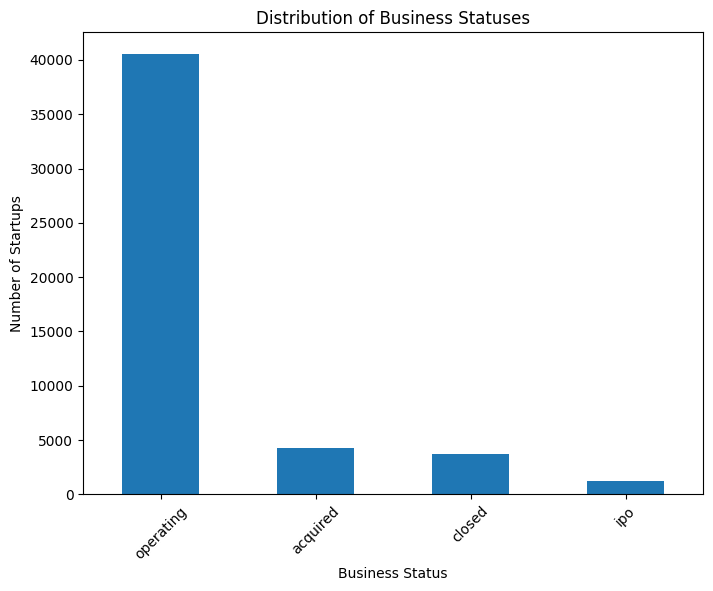

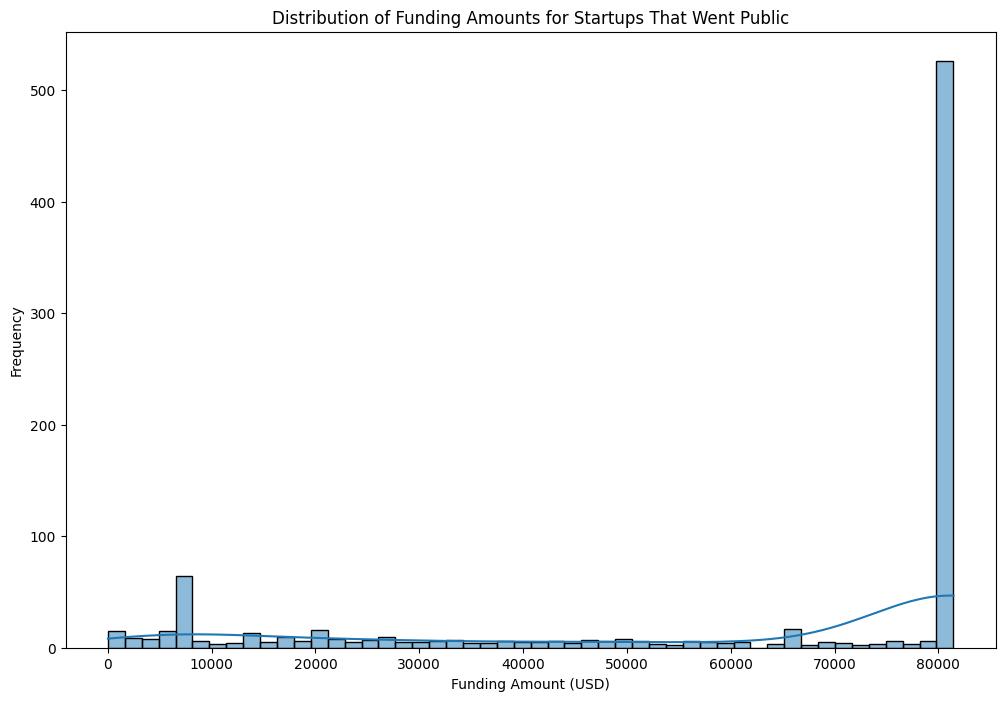

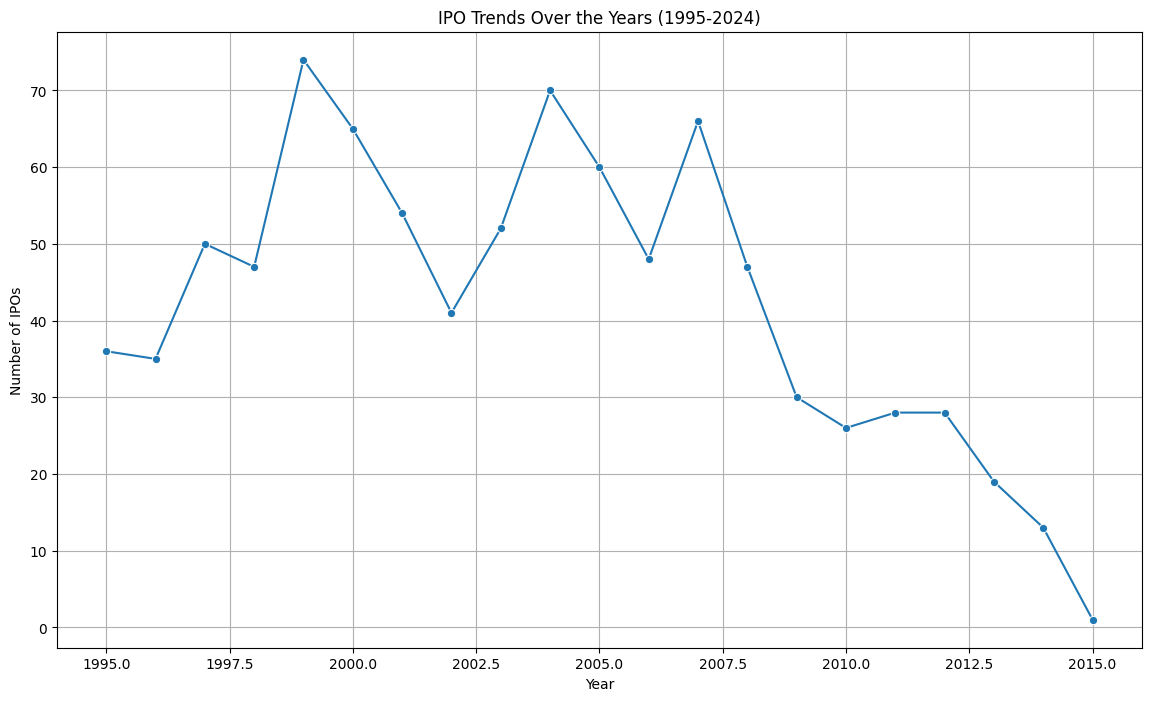

Percentage of Startups with IPO Status: 1.79%
Average Funding Amount for IPO Startups: $60228.29


In [23]:
# Ensure 'founded_at' is converted to datetime and filter for the IPO status
df['founded_at'] = pd.to_datetime(df['founded_at'], errors='coerce')
df['founded_year'] = df['founded_at'].dt.year

# Plot the distribution of business statuses
plt.figure(figsize=(8, 6))
df['status'].value_counts().plot(kind='bar')
plt.title('Distribution of Business Statuses')
plt.xlabel('Business Status')
plt.ylabel('Number of Startups')
plt.xticks(rotation=45)
plt.show()

# Filter the data for IPOs and the year range between 1995 and 2024
ipo_df = df[(df['status'].str.lower() == 'ipo') & (df['founded_year'].between(1995, 2024))]

# Plot the distribution of funding amounts for startups that went public
plt.figure(figsize=(12, 8))
sns.histplot(ipo_df['funding_total_usd'].dropna(), bins=50, kde=True)
plt.title('Distribution of Funding Amounts for Startups That Went Public')
plt.xlabel('Funding Amount (USD)')
plt.ylabel('Frequency')
plt.show()

# Aggregate IPO counts by year
ipo_trends = ipo_df.groupby('founded_year').size().reset_index(name='number_of_ipos')

# Plot the trends of IPOs over the years
plt.figure(figsize=(14, 8))
sns.lineplot(data=ipo_trends, x='founded_year', y='number_of_ipos', marker='o')
plt.title('IPO Trends Over the Years (1995-2024)')
plt.xlabel('Year')
plt.ylabel('Number of IPOs')
plt.grid(True)
plt.show()

# Calculate the percentage of startups with the status 'IPO'
total_startups = len(df)
ipo_startups = len(ipo_df)
ipo_percentage = (ipo_startups / total_startups) * 100

# Calculate the average funding amount for startups with the status 'IPO'
avg_funding_ipo = ipo_df['funding_total_usd'].mean() 

# Print the results
print(f"Percentage of Startups with IPO Status: {ipo_percentage:.2f}%")
print(f"Average Funding Amount for IPO Startups: ${avg_funding_ipo:.2f}")


In [24]:
df['funding_total_usd'] = df['funding_total_usd'].fillna(df['funding_total_usd'].median())
df['founded_at'] = pd.to_datetime(df['founded_at'], errors='coerce')


In [25]:
df['category_list'] = df['category_list'].fillna('Others')
df['country_code'] = df['country_code'].fillna('Others')
df['name'] = df['name'].fillna('Others')

In [26]:
def map_status_to_ipo(status):
    if 'ipo' in status:
        return 'yes'
    else:
        return 'no'
df['status_ipo'] = df['status'].apply(map_status_to_ipo)
df.head()

,name,category_list,funding_total_usd,status,country_code,funding_rounds,founded_at,first_funding_at,last_funding_at,company_age,funding_stage,funding_level,founded_year,status_ipo
1,:Qounter,Application Platforms|Real Time|Social Network...,2327.162786,operating,USA,2,2014-09-04,2014-03-01,2014-10-14,0.255618,Early Stage,Low,2014,no
3,0-6.com,Curated Web,6649.042705,operating,CHN,1,2007-01-01,2008-03-19,2008-03-19,0.275281,Early Stage,Low,2007,no
4,004 Technologies,Software,6649.042705,operating,USA,1,2010-01-01,2014-07-24,2014-07-24,0.266854,Early Stage,Low,2010,no
6,Ondine Biomedical Inc.,Biotechnology,2536.112382,operating,CAN,2,1997-01-01,2009-09-11,2009-12-21,0.303371,Early Stage,Low,1997,no
7,H2O.ai,Analytics,81439.389975,operating,USA,4,2011-01-01,2013-01-03,2015-11-09,0.264045,Growth Stage,Low,2011,no


In [27]:
# Drop the original 'status' column
df = df.drop(columns=['status'])

In [28]:
df.head()

,name,category_list,funding_total_usd,country_code,funding_rounds,founded_at,first_funding_at,last_funding_at,company_age,funding_stage,funding_level,founded_year,status_ipo
1,:Qounter,Application Platforms|Real Time|Social Network...,2327.162786,USA,2,2014-09-04,2014-03-01,2014-10-14,0.255618,Early Stage,Low,2014,no
3,0-6.com,Curated Web,6649.042705,CHN,1,2007-01-01,2008-03-19,2008-03-19,0.275281,Early Stage,Low,2007,no
4,004 Technologies,Software,6649.042705,USA,1,2010-01-01,2014-07-24,2014-07-24,0.266854,Early Stage,Low,2010,no
6,Ondine Biomedical Inc.,Biotechnology,2536.112382,CAN,2,1997-01-01,2009-09-11,2009-12-21,0.303371,Early Stage,Low,1997,no
7,H2O.ai,Analytics,81439.389975,USA,4,2011-01-01,2013-01-03,2015-11-09,0.264045,Growth Stage,Low,2011,no


In [29]:
print(df.dtypes)

name                         object
category_list                object
funding_total_usd           float64
country_code                 object
funding_rounds                int64
founded_at           datetime64[ns]
first_funding_at     datetime64[ns]
last_funding_at      datetime64[ns]
company_age                 float64
funding_stage                object
funding_level                object
founded_year                  int64
status_ipo                   object
dtype: object


In [30]:
import pandas as pd
from scipy.stats import chi2_contingency

In [31]:
contingency_table = pd.crosstab(df['funding_rounds'], df['status_ipo'])

In [32]:
chi2, p, dof, expected = chi2_contingency(contingency_table)

In [33]:
if p < 0.05:
    print("There is a significant association between industry category and business status.")
    print(p)
else:
    print("There is no significant association between industry category and business status.")

There is a significant association between industry category and business status.
2.205008007695777e-164


In [34]:
contingency_table = pd.crosstab(df['category_list'], df['status_ipo'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(p)
if p < 0.05:
    print("There is a significant association between industry category and business status.")
else:
    print("There is no significant association between industry category and business status.")

1.0
There is no significant association between industry category and business status.


In [35]:
contingency_table = pd.crosstab(df['country_code'], df['status_ipo'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(p)
if p < 0.05:
    print("There is a significant association between industry category and business status.")
else:
    print("There is no significant association between industry category and business status.")

1.1695150028139579e-26
There is a significant association between industry category and business status.


In [36]:
contingency_table = pd.crosstab(df['funding_level'], df['status_ipo'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(p)
if p < 0.05:
    print("There is a significant association between industry category and business status.")
else:
    print("There is no significant association between industry category and business status.")

1.0
There is no significant association between industry category and business status.


In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [38]:
df['category_list'] = df['category_list'].fillna('Others')
df['status_ipo'] = df['status_ipo'].fillna('Others')
df['country_code'] = df['country_code'].fillna('Others')

In [39]:
# Define the target variable
target = 'status_ipo'

# Perform stratified sampling
train, test = train_test_split(df, test_size=0.2, stratify=df[target], random_state=42)

In [40]:
# Perform random sampling
train_random, test_random = train_test_split(df, test_size=0.2, random_state=42)

In [41]:
print("Stratified Sampling - Train Set Distribution:")
print(train['status_ipo'].value_counts(normalize=True))

print("Stratified Sampling - Test Set Distribution:")
print(test['status_ipo'].value_counts(normalize=True))

print("Random Sampling - Train Set Distribution:")
print(train_random['status_ipo'].value_counts(normalize=True))

print("Random Sampling - Test Set Distribution:")
print(test_random['status_ipo'].value_counts(normalize=True))

Stratified Sampling - Train Set Distribution:
no     0.976225
yes    0.023775
Name: status_ipo, dtype: float64
Stratified Sampling - Test Set Distribution:
no     0.976253
yes    0.023747
Name: status_ipo, dtype: float64
Random Sampling - Train Set Distribution:
no     0.976301
yes    0.023699
Name: status_ipo, dtype: float64
Random Sampling - Test Set Distribution:
no     0.975951
yes    0.024049
Name: status_ipo, dtype: float64


In [42]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
# function to convert Timestamp to numerical features
def convert_timestamps(df):
    df = df.copy()
    for col in df.select_dtypes(include=['datetime64']):
        df[col + '_year'] = df[col].dt.year
        df[col + '_month'] = df[col].dt.month
        df[col + '_day'] = df[col].dt.day
        df[col + '_dayofweek'] = df[col].dt.dayofweek
        df[col + '_dayofyear'] = df[col].dt.dayofyear
        df.drop(columns=[col], inplace=True)
    return df

# Apply conversion
df = convert_timestamps(df)

In [43]:
from sklearn.preprocessing import LabelEncoder

# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Define the column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_columns)
    ],
    remainder='passthrough'
)

# Apply preprocessing
df_encoded = preprocessor.fit_transform(df)

label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

#print the datatypes and null value check
print(df.dtypes)
print(df.isna().sum())

name                            int32
category_list                   int32
funding_total_usd             float64
country_code                    int32
funding_rounds                  int64
company_age                   float64
funding_stage                   int32
funding_level                   int32
founded_year                    int64
status_ipo                      int32
founded_at_year                 int64
founded_at_month                int64
founded_at_day                  int64
founded_at_dayofweek            int64
founded_at_dayofyear            int64
first_funding_at_year           int64
first_funding_at_month          int64
first_funding_at_day            int64
first_funding_at_dayofweek      int64
first_funding_at_dayofyear      int64
last_funding_at_year            int64
last_funding_at_month           int64
last_funding_at_day             int64
last_funding_at_dayofweek       int64
last_funding_at_dayofyear       int64
dtype: object
name                          0
cate

In [44]:
X = df[['funding_rounds', 'country_code','category_list']]
y = df['status_ipo']

# Split the dataset into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)


In [45]:
import pandas as pd

# Check for NaNs in X_train and y_train
print(pd.DataFrame(X_train).isna().sum())
print(pd.Series(y_train).isna().sum())


funding_rounds    0
country_code      0
category_list     0
dtype: int64
0


In [46]:
print(df.dtypes)


name                            int32
category_list                   int32
funding_total_usd             float64
country_code                    int32
funding_rounds                  int64
company_age                   float64
funding_stage                   int32
funding_level                   int32
founded_year                    int64
status_ipo                      int32
founded_at_year                 int64
founded_at_month                int64
founded_at_day                  int64
founded_at_dayofweek            int64
founded_at_dayofyear            int64
first_funding_at_year           int64
first_funding_at_month          int64
first_funding_at_day            int64
first_funding_at_dayofweek      int64
first_funding_at_dayofyear      int64
last_funding_at_year            int64
last_funding_at_month           int64
last_funding_at_day             int64
last_funding_at_dayofweek       int64
last_funding_at_dayofyear       int64
dtype: object


In [47]:
# Convert sparse matrix to dense
print(type(df_encoded))
# Verify data types and ensure all are numeric
print("Data type of df_encoded:", type(df_encoded))
print("First few rows of encoded features:", df_encoded[:5])
print("Data type of y_train_encoded:", df_encoded.dtype)

<class 'scipy.sparse._csr.csr_matrix'>
Data type of df_encoded: <class 'scipy.sparse._csr.csr_matrix'>
First few rows of encoded features:   (0, 437)	1.0
  (0, 53769)	1.0
  (0, 73049)	1.0
  (0, 73056)	1.0
  (0, 73059)	1.0
  (0, 73060)	1.0
  (0, 73062)	2327.1627859784503
  (0, 73063)	2.0
  (0, 73064)	0.2556179775280899
  (0, 73065)	2014.0
  (0, 73066)	2014.0
  (0, 73067)	9.0
  (0, 73068)	4.0
  (0, 73069)	3.0
  (0, 73070)	247.0
  (0, 73071)	2014.0
  (0, 73072)	3.0
  (0, 73073)	1.0
  (0, 73074)	5.0
  (0, 73075)	60.0
  (0, 73076)	2014.0
  (0, 73077)	10.0
  (0, 73078)	14.0
  (0, 73079)	1.0
  (0, 73080)	287.0
  :	:
  (3, 73080)	355.0
  (4, 17461)	1.0
  (4, 51910)	1.0
  (4, 73049)	1.0
  (4, 73057)	1.0
  (4, 73059)	1.0
  (4, 73060)	1.0
  (4, 73062)	81439.389975341
  (4, 73063)	4.0
  (4, 73064)	0.2640449438202247
  (4, 73065)	2011.0
  (4, 73066)	2011.0
  (4, 73067)	1.0
  (4, 73068)	1.0
  (4, 73069)	5.0
  (4, 73070)	1.0
  (4, 73071)	2013.0
  (4, 73072)	1.0
  (4, 73073)	3.0
  (4, 73074)	3.0
  (4,

In [48]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [49]:
# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data
X_train_resampled_scaled = scaler.fit_transform(X_train_resampled)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

In [50]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

# Initialize and train Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred = dt.predict(X_test)

# Evaluate model
print(classification_report(y_test, y_pred))

# Hyperparameter tuning to address overfitting
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train_resampled, y_train_resampled)

# Best model
best_dt = grid_search.best_estimator_
y_pred_best = best_dt.predict(X_test)
print(classification_report(y_test, y_pred_best))

              precision    recall  f1-score   support

           0       0.98      0.81      0.89      9702
           1       0.05      0.42      0.09       236

    accuracy                           0.80      9938
   macro avg       0.52      0.62      0.49      9938
weighted avg       0.96      0.80      0.87      9938

              precision    recall  f1-score   support

           0       0.98      0.77      0.86      9702
           1       0.05      0.51      0.09       236

    accuracy                           0.76      9938
   macro avg       0.52      0.64      0.48      9938
weighted avg       0.96      0.76      0.85      9938



In [51]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler


# Create a pipeline with SMOTE and StandardScaler
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),  # Apply SMOTE to balance the classes
    ('scaler', StandardScaler()),       # Standardize the features
    ('svm', SVC(kernel='linear', class_weight='balanced', random_state=42))  # Train the SVM with balanced class weights
])

# Train the SVM model using the pipeline
pipeline.fit(X_train, y_train)

# Predict on the training set
y_train_pred = pipeline.predict(X_train)
print("Classification report for training set:")
print(classification_report(y_train, y_train_pred))

# Predict on the test set
y_pred = pipeline.predict(X_test)
print("Classification report for test set:")
print(classification_report(y_test, y_pred))



Classification report for training set:
              precision    recall  f1-score   support

           0       0.98      0.81      0.89     29102
           1       0.05      0.45      0.10       709

    accuracy                           0.80     29811
   macro avg       0.52      0.63      0.49     29811
weighted avg       0.96      0.80      0.87     29811

Classification report for test set:
              precision    recall  f1-score   support

           0       0.98      0.80      0.88      9702
           1       0.05      0.41      0.09       236

    accuracy                           0.79      9938
   macro avg       0.52      0.61      0.49      9938
weighted avg       0.96      0.79      0.87      9938



In [52]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier

# Create a pipeline with SMOTE, StandardScaler, and MLPClassifier
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),              # Apply SMOTE to balance the classes
    ('scaler', StandardScaler()),                   # Standardize the features
    ('mlp', MLPClassifier(hidden_layer_sizes=(64, 32),   # Neural network architecture
                           activation='relu',
                           solver='adam',
                           max_iter=200,
                           random_state=42))         # Neural network model without class weights
])

# Train the neural network model using the pipeline
pipeline.fit(X_train, y_train)

# Predict on the training set
y_train_pred = pipeline.predict(X_train)
print("Classification report for training set:")
print(classification_report(y_train, y_train_pred))

# Predict on the test set
y_pred = pipeline.predict(X_test)
print("Classification report for test set:")
print(classification_report(y_test, y_pred))

Classification report for training set:
              precision    recall  f1-score   support

           0       0.99      0.67      0.80     29102
           1       0.05      0.70      0.09       709

    accuracy                           0.67     29811
   macro avg       0.52      0.68      0.44     29811
weighted avg       0.97      0.67      0.78     29811

Classification report for test set:
              precision    recall  f1-score   support

           0       0.98      0.67      0.79      9702
           1       0.04      0.56      0.07       236

    accuracy                           0.66      9938
   macro avg       0.51      0.61      0.43      9938
weighted avg       0.96      0.66      0.78      9938



In [57]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
from torch_geometric.data import Data

# Define a simple Graph Convolutional Network (GCN)
class GCN(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(input_dim, hidden_dim)
        self.conv2 = GCNConv(hidden_dim, output_dim)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = self.conv2(x, edge_index)
        return F.log_softmax(x, dim=1)

# Load data and create graph dataset with train/test masks and labels
def load_graph_data():
    # Example node features and edge index
    x = torch.tensor([[1, 0], [0, 1], [1, 1]], dtype=torch.float)  # Node features
    edge_index = torch.tensor([[0, 1], [1, 2]], dtype=torch.long)  # Edge list

    # Labels for each node (e.g., 0 or 1 for binary classification)
    y = torch.tensor([0, 1, 0], dtype=torch.long)

    # Create train, validation, and test masks
    train_mask = torch.tensor([True, False, True], dtype=torch.bool)  # Only nodes 0 and 2 are used for training
    test_mask = torch.tensor([False, True, False], dtype=torch.bool)  # Only node 1 is used for testing

    # Create the data object and add train/test masks and labels
    data = Data(x=x, edge_index=edge_index.t().contiguous(), y=y, train_mask=train_mask, test_mask=test_mask)
    return data

# Train the GNN model
def train_gnn():
    # Load your graph data
    data = load_graph_data()

    # Define the GNN model
    model = GCN(input_dim=2, hidden_dim=4, output_dim=2)

    # Set up optimizer
    optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

    model.train()
    for epoch in range(200):  # Example number of epochs
        optimizer.zero_grad()
        out = model(data)
        
        # Use only nodes marked by train_mask for loss computation
        loss = F.nll_loss(out[data.train_mask], data.y[data.train_mask])
        loss.backward()
        optimizer.step()

        if epoch % 20 == 0:
            print(f'Epoch {epoch}, Loss: {loss.item()}')

    return model, data

# Test the GNN model
def test_gnn(model, data):
    model.eval()
    with torch.no_grad():
        out = model(data)
        pred = out[data.test_mask].max(1)[1]  # Get the index of the max log-probability
        acc = pred.eq(data.y[data.test_mask]).sum().item() / data.test_mask.sum().item()
        print(f'Accuracy: {acc:.4f}')

# Call the training and testing function
model, data = train_gnn()
test_gnn(model, data)


Epoch 0, Loss: 1.0572179555892944
Epoch 20, Loss: 0.3895938992500305
Epoch 40, Loss: 0.12767864763736725
Epoch 60, Loss: 0.04248054325580597
Epoch 80, Loss: 0.018711578100919724
Epoch 100, Loss: 0.010687150061130524
Epoch 120, Loss: 0.007084788754582405
Epoch 140, Loss: 0.005106045864522457
Epoch 160, Loss: 0.003878515213727951
Epoch 180, Loss: 0.0030564223416149616
Accuracy: 0.7346
